In [ ]:
import numpy as np
from numpy import array
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import transforms
%matplotlib inline

In [ ]:
steering_percentage = 0.5
truck_translation = array([5,5])
truck_rotation = -135
destination_translation = array([18,17.5])
destination_rotation = 90

In [ ]:
yard_shape = array([20,20])
truck_shape = array([5,2])
wheel_shape = array([0.8,0.4])
wheel_translations = array([
    [0,0],
    [-1,-0.8],
    [-1,0.8],
    [0,-0.8],
    [0,0.8],
    [2,-0.8],
    [2,0.8]])
rotation_center = array([2,1])
maximal_steering_angle = 60

# item numbers
# 0: chassis
# 1: wheel back right
# 2: wheel back left
# 3: wheel middle right
# 4: wheel middle left
# 5: wheel front right
# 6: wheel front left 

wheel_steering_rotations = array([0,-0.6,-0.6,0,0,1,1])

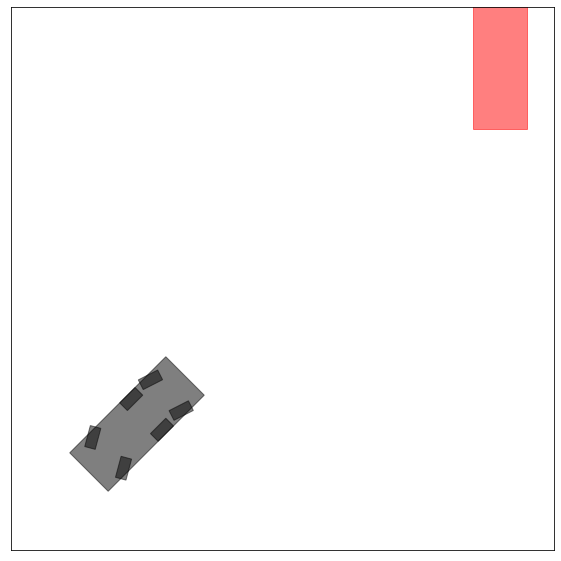

In [4]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, aspect='equal')
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

chassis_rectangle = patches.Rectangle(-rotation_center,truck_shape[0],truck_shape[1],color="black",alpha=0.50)
wheel_rectangles = [patches.Rectangle(-wheel_shape/2,wheel_shape[0],wheel_shape[1],color="black",alpha=0.50) for wheel_number in range(wheel_translations.shape[0])]
everything = [chassis_rectangle]+wheel_rectangles

item_number = 0
item_rotation = []
item_translation = []

for item_number in range(len(everything)-1):
    # rotate wheels
    item_rotation = item_rotation+[transforms.Affine2D().rotate_deg(steering_percentage*maximal_steering_angle*wheel_steering_rotations[item_number])]
    # translate wheels
    item_translation = item_translation+[transforms.Affine2D().translate(wheel_translations[item_number,0],wheel_translations[item_number,1])]
# rotate chassis with wheels
rotation_everything = transforms.Affine2D().rotate_deg(truck_rotation)
# translate chassis with wheels
translation_everything = transforms.Affine2D().translate(truck_translation[0],truck_translation[1])

for item_number in range(len(everything)-1):
    item_transformation = item_rotation[item_number]+item_translation[item_number]+rotation_everything+translation_everything+ax1.transData
    everything[item_number].set_transform(item_transformation)
    ax1.add_patch(everything[item_number])

destination_rectangle = patches.Rectangle(-rotation_center,truck_shape[0],truck_shape[1], color="red", alpha=0.50)
rotation_destination = transforms.Affine2D().rotate_deg(destination_rotation)
translation_destination = transforms.Affine2D().translate(destination_translation[0],destination_translation[1])
destination_transformation = rotation_destination+translation_destination+ax1.transData
destination_rectangle.set_transform(destination_transformation)
ax1.add_patch(destination_rectangle)

plt.xlim(0, yard_shape[0])
plt.ylim(0, yard_shape[1])

plt.show()